# Plot standard and normalised powercurves for all 25 turbines

In [ ]:
"""Plot standard and normalised powercurves for all 25 turbines

"""

In [1]:
# import libraries
import pandas as pd
import itertools

In [5]:
# create dataframe from CSV
scada = pd.read_csv('data/SCADA_merged.csv', skip_blank_lines=True)

In [6]:
# standard power curves
# create pivot table (new dataframe)
power = pd.pivot_table(
    scada, index=['ws_av'], columns=['turbine'], values=['ap_av'])

In [7]:
# removing pivot table values name from heading
power.columns = power.columns.droplevel(0)

In [8]:
# list of column headers (i.e., turbines 1 to 25)
cols = power.columns.tolist()

In [9]:
# create new list for individual subplot titles
subplt = ['Power curve for turbine %s' % x for x in cols]

In [10]:
# rename index (x-axis title)
power.index.name = 'Wind speed (m/s)'

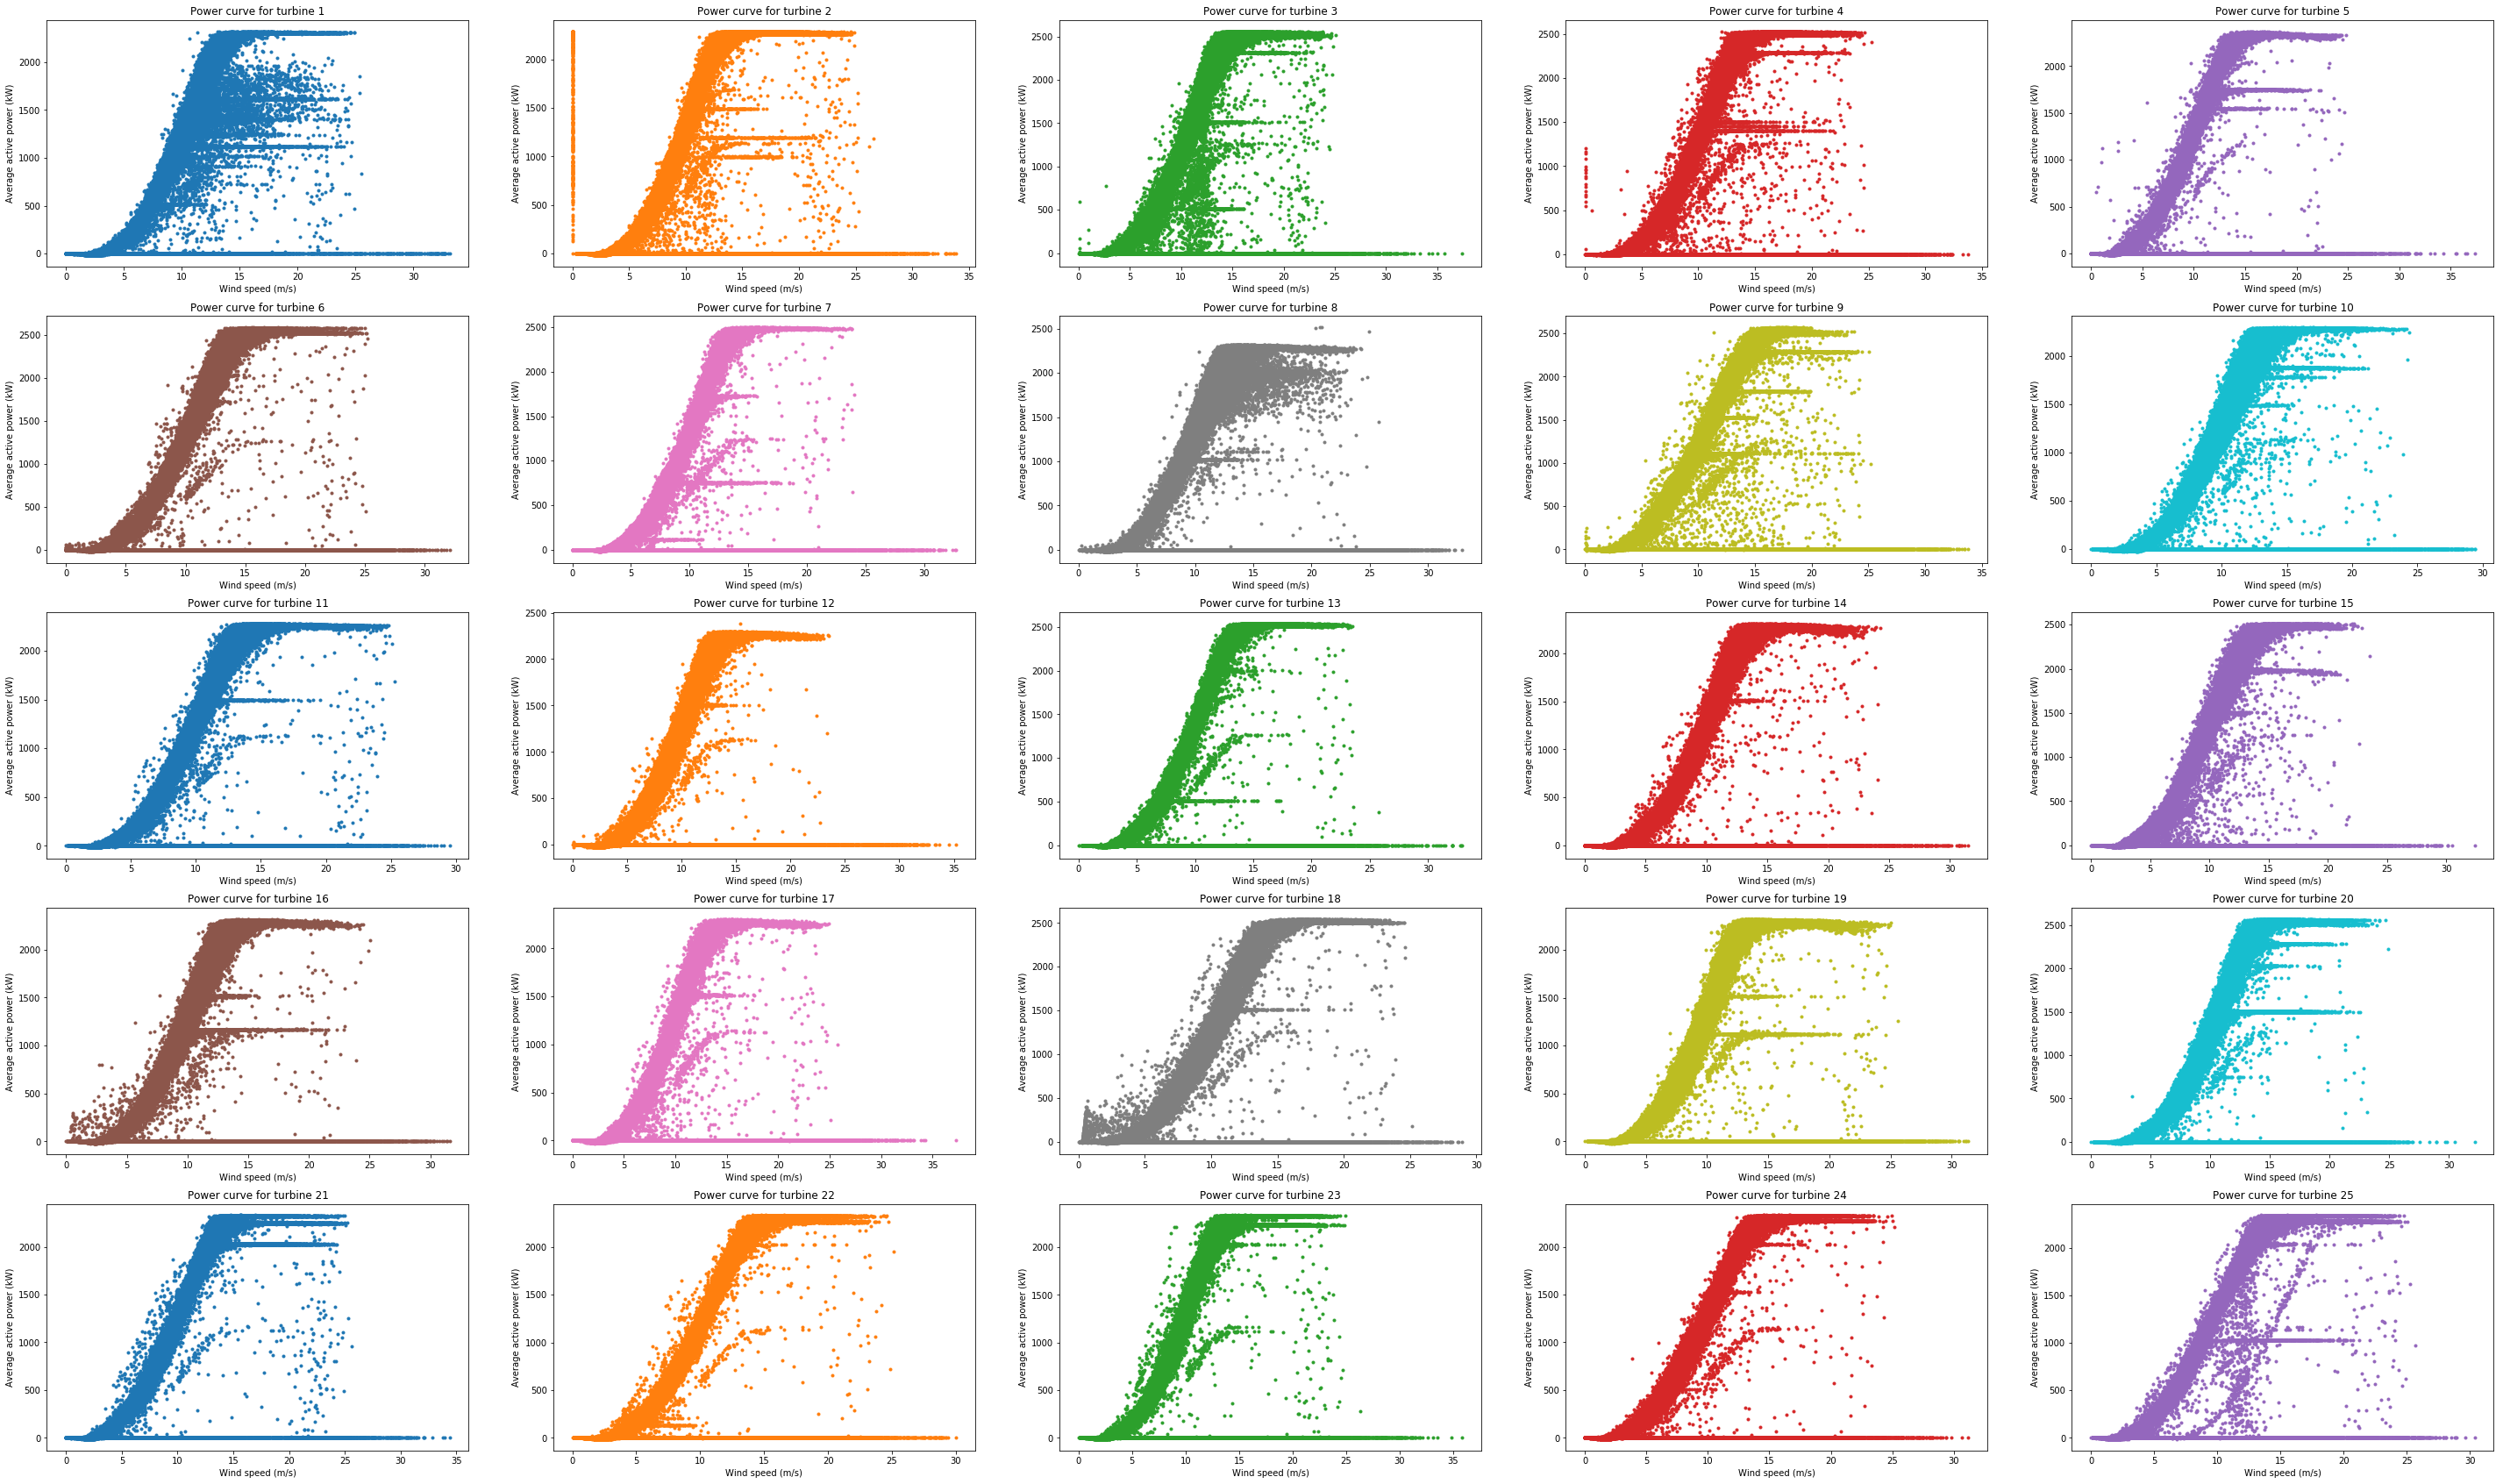

In [11]:
# plotting all columns (i.e., turbines 1 to 25) in the same figure
powerplt = power.plot(
    subplots=True, figsize=(50, 30), layout=(5, 5), style='.',
    sharex=False, title=subplt, legend=False)
# y-axis title
# based on layout=(x, y), create lists with range(0, x) and (0, y)
layout = list(range(0, 5))
# get coordinates of each subplot
coord = list(itertools.product(layout, layout))
for (x, y) in coord:
    powerplt[x][y].set_ylabel('Average active power (kW)')

In [12]:
# normalised power curves
# normalise using feature scaling (all values in the range [0, 1])
power_norm = (
    power - power.min()) / (power.max() - power.min())
power_norm.index = (
    power.index - power.index.min()) / (power.index.max() - power.index.min())

In [13]:
# create new list for individual subplot titles
subplt_norm = ['Normalised power curve for turbine %s' % x for x in cols]

In [14]:
# rename index
power_norm.index.name = 'Wind speed'

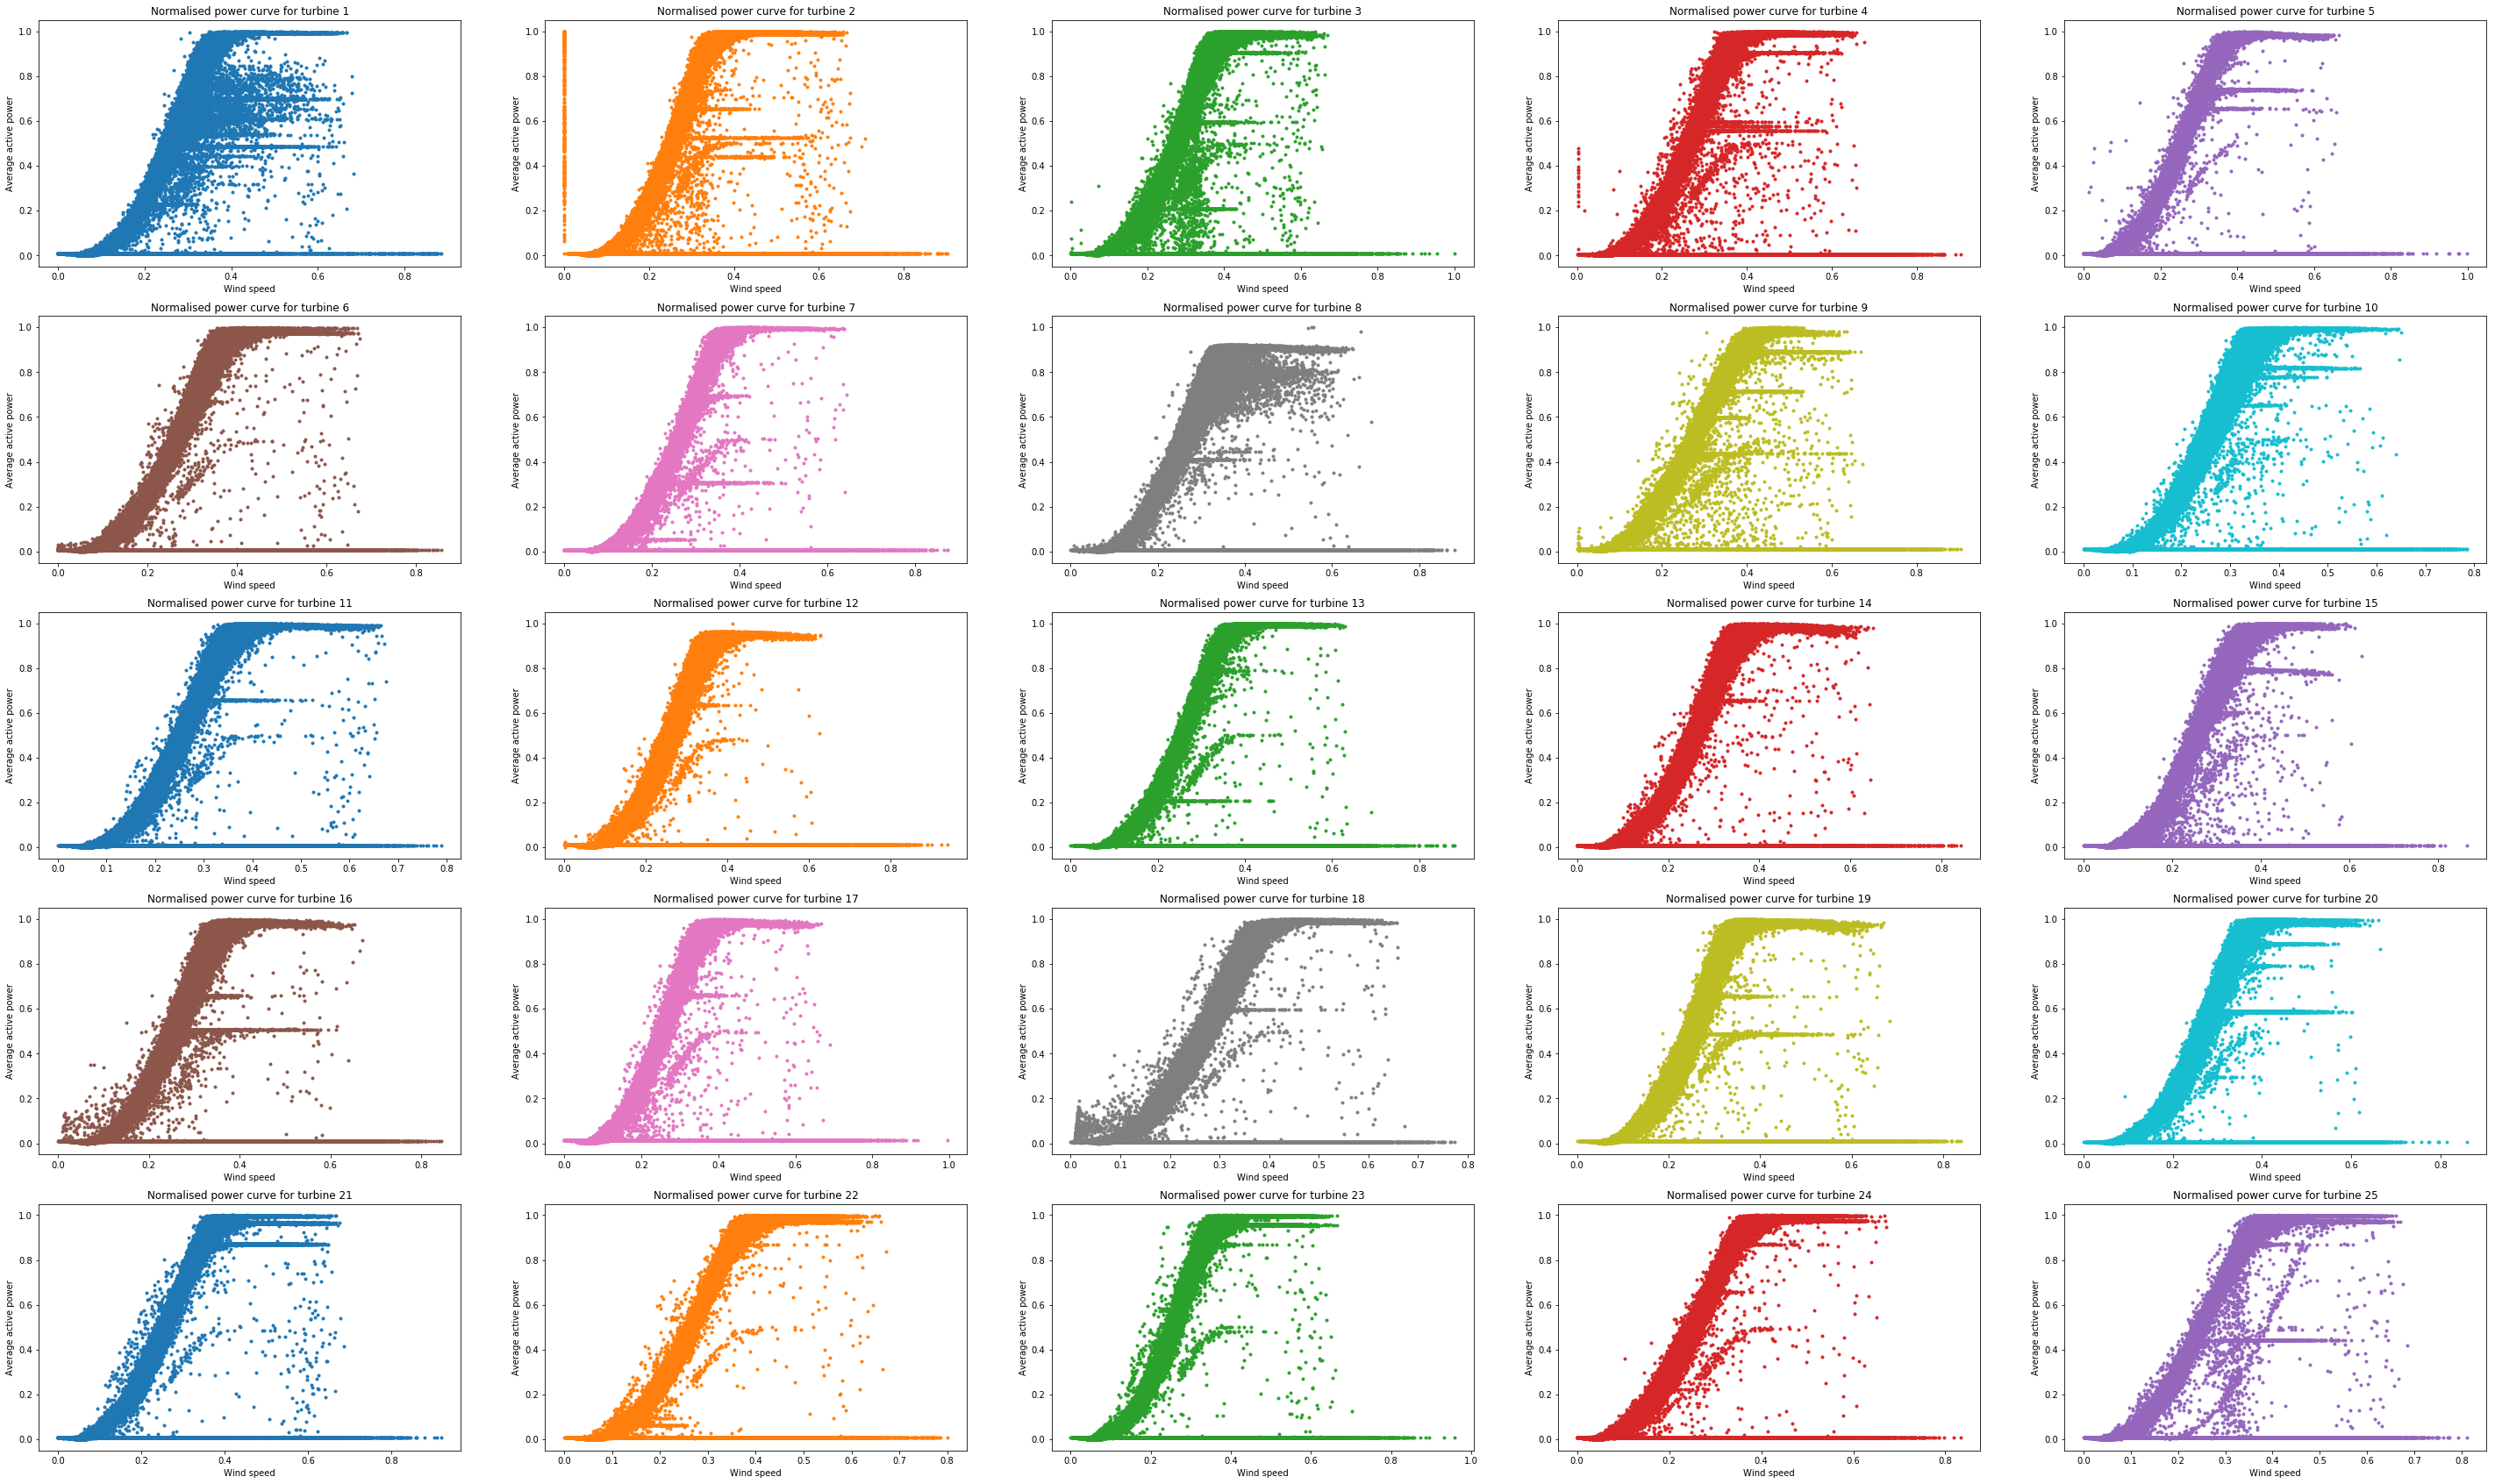

In [15]:
# plotting all columns (i.e., turbines 1 to 25) in the same figure
powerplt_norm = power_norm.plot(
    subplots=True, figsize=(50, 30), layout=(5, 5), style='.',
    sharex=False, title=subplt_norm, legend=False)
for (x, y) in coord:
    powerplt_norm[x][y].set_ylabel('Average active power')